**Salary Benchmarking & Compensation Trends**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")

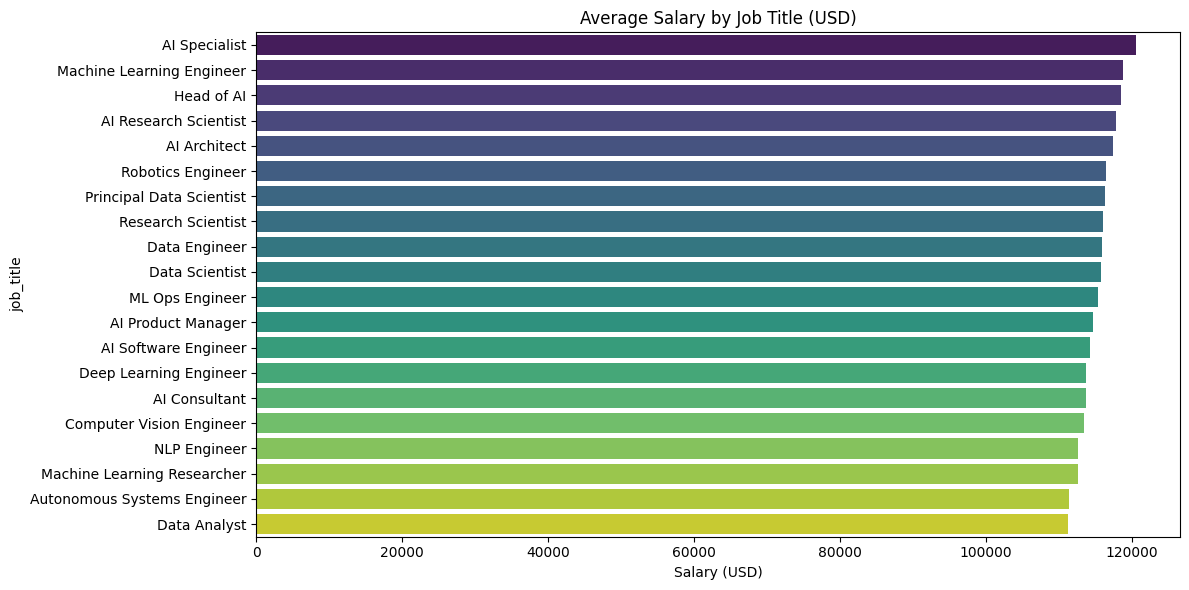

In [3]:
# Average salary by job title
salary_by_title = df.groupby("job_title")["salary_usd"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=salary_by_title.values, y=salary_by_title.index, palette="viridis")
plt.title("Average Salary by Job Title (USD)")
plt.xlabel("Salary (USD)")
plt.tight_layout()
plt.show()

**2. Remote Work & Global Mobility Insights**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


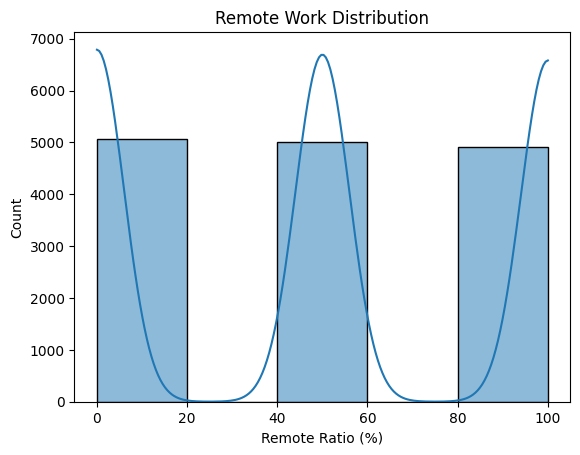

In [4]:
# Remote ratio distribution
sns.histplot(df["remote_ratio"], bins=5, kde=True)
plt.title("Remote Work Distribution")
plt.xlabel("Remote Ratio (%)")
plt.show()

In [5]:
# Cross-border employment
cross_border = df[df["company_location"] != df["employee_residence"]]
print("Cross-border job postings:", len(cross_border))

Cross-border job postings: 4256


**3. Skill Demand & Gap Analysis**

In [6]:
from collections import Counter

In [7]:
# Flatten and count skills
skills = df["required_skills"].dropna().str.split(",")
flat_skills = [skill.strip().lower() for sublist in skills for skill in sublist]
skill_counts = Counter(flat_skills)

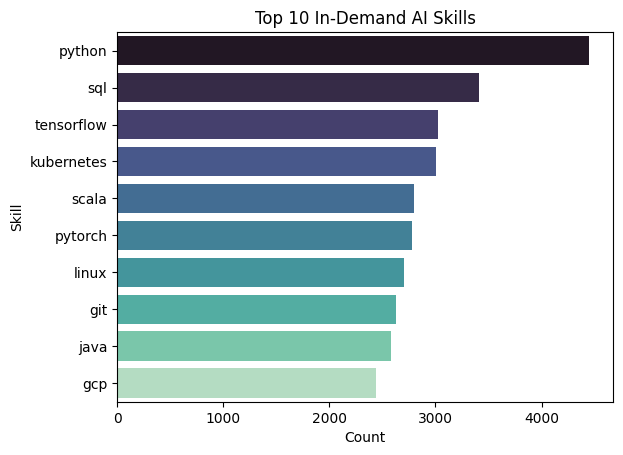

In [8]:
# Top 10 skills
top_skills = pd.DataFrame(skill_counts.most_common(10), columns=["Skill", "Count"])
sns.barplot(data=top_skills, x="Count", y="Skill", palette="mako")
plt.title("Top 10 In-Demand AI Skills")
plt.show()

**4. Education & Experience Alignment**

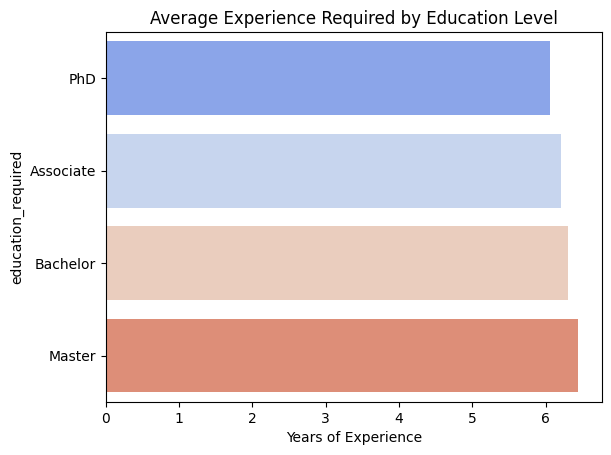

In [9]:
# Experience vs. Education
edu_exp = df.groupby("education_required")["years_experience"].mean().sort_values()

sns.barplot(x=edu_exp.values, y=edu_exp.index, palette="coolwarm")
plt.title("Average Experience Required by Education Level")
plt.xlabel("Years of Experience")
plt.show()

**5. Hiring Seasonality & Forecasting**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


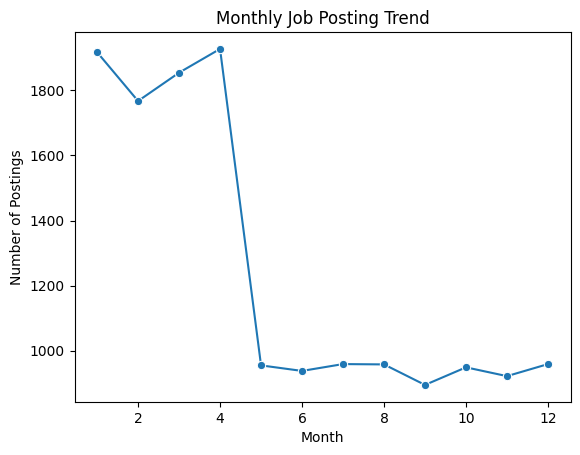

In [10]:
df["posting_date"] = pd.to_datetime(df["posting_date"])
monthly_trend = df["posting_date"].dt.month.value_counts().sort_index()

sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o")
plt.title("Monthly Job Posting Trend")
plt.xlabel("Month")
plt.ylabel("Number of Postings")
plt.show()

**6. Company & Industry Intelligence**

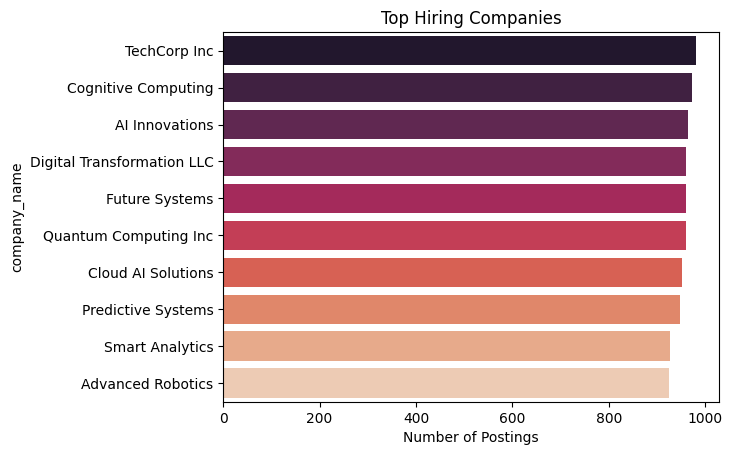

In [11]:
# Top hiring companies
top_companies = df["company_name"].value_counts().head(10)

sns.barplot(x=top_companies.values, y=top_companies.index, palette="rocket")
plt.title("Top Hiring Companies")
plt.xlabel("Number of Postings")
plt.show()

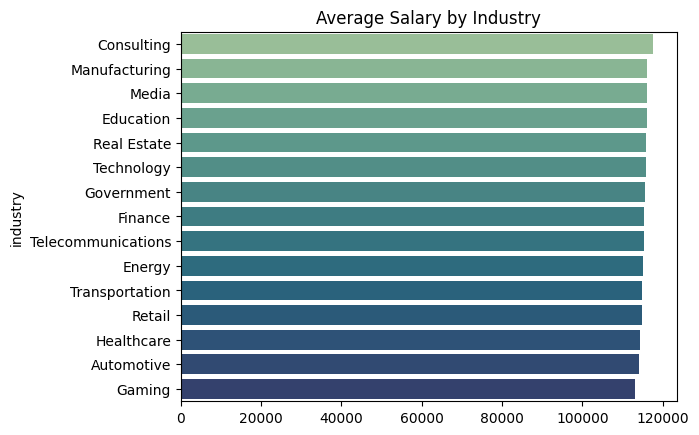

In [12]:
# Industry salary comparison
industry_salary = df.groupby("industry")["salary_usd"].mean().sort_values(ascending=False)

sns.barplot(x=industry_salary.values, y=industry_salary.index, palette="crest")
plt.title("Average Salary by Industry")
plt.show()

**7. Job Description Quality & NLP Scoring**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


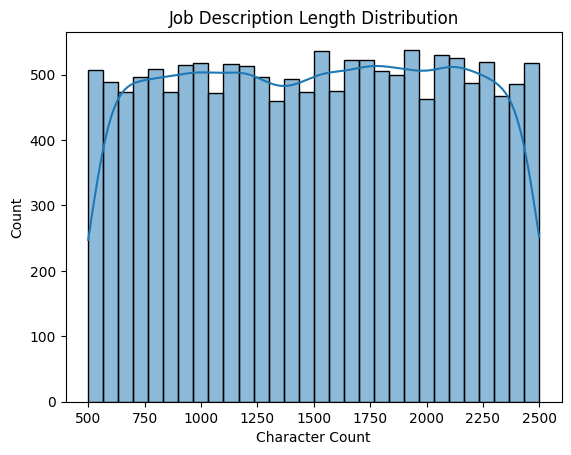

In [13]:
# Description length distribution
sns.histplot(df["job_description_length"], bins=30, kde=True)
plt.title("Job Description Length Distribution")
plt.xlabel("Character Count")
plt.show()

In [14]:
# Correlation with benefits score
corr = df[["job_description_length", "benefits_score"]].corr()
print("Correlation between description length and benefits score:\n", corr)

Correlation between description length and benefits score:
                         job_description_length  benefits_score
job_description_length                1.000000        0.006744
benefits_score                        0.006744        1.000000
